# **- Machine Learning -**
# _* Decision Tree *_
## **+ '``Decision Tree Regressor``' and '``Decision Tree Classifier``' +**
### **+ _Hitters Data - Diabetes Data_ +**

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## **Hitters Data** with **'``Decision Tree Regressor``' :**

In [3]:
df = pd.read_csv('Hitters_Data.csv')
df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


+ Yaratacağımız **Decision Tree** için **,** şimdilik sadece **2** tane Feature ile çalışalım **:**

In [2]:
df = pd.read_csv('Hitters_Data.csv')

df = df[['Hits' , 'Years' , 'Salary']]

#   'NaN' değeri olan satırları kaldıralım :
df = df.dropna()
df

,Hits,Years,Salary
1,81,14,475.0
2,130,3,480.0
3,141,11,500.0
4,87,2,91.5
5,169,11,750.0
...,...,...,...
317,127,5,700.0
318,136,12,875.0
319,126,6,385.0
320,144,8,960.0


+ Öncelikle **Feature** ve **Target** kolonlarını ayıralım **:**

In [3]:
X = df.drop('Salary' , axis=1)

#   'y' (Target) kolonu da , Satış değerlerinin LOGARİTMASI olsun :
y = np.log(df['Salary'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hits    263 non-null    int64  
 1   Years   263 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2 KB


+ **TRAIN** ve **TEST** olarak Veri Setini ayıralım **:**

In [4]:
#   Split data into TRAINING and TEST sets :
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1)

+ **Decision Tree Regression** modeli için bir **'instance'** yaratalım ve sonra da FIT edelim **:**
<br> Yani bir **Tree (Ağaç)** kuralım (inşa edelim) **:**

In [5]:
#   Create a regressor object :
regressor = DecisionTreeRegressor()

#   FIT the regressor :
regressor.fit(X_train , y_train)

DecisionTreeRegressor()

Yukarıda **;** hiçbir parametre ve komut girmediğimiz için **,** DEFAULT bir **'Decision Tree' construct ettik (kurduk).**

+ Şimdi de bu kurduğumuz **Decision Tree'yi (Karar Ağacını)** çizdirelim **:**

**++++ NOTE ++++**
<br> **'``tree``'** modülünün içerisinde **, '.plot_tree( )'** fonksiyonunu kullandığımızda **;**
<br> **Construct ettiğimiz (Kurduğumuz **,** İnşa ettiğimiz)** Ağacı **,** bize çizdiriyor... **:**

**++++ NOTE ++++**
<br> **``tree.plot_tree( )``** fonksiyonunun içerisinde **(filled=True)** komutunu girersek **;**
<br> **'node'**'lerin yani **düğümlerin** daha kolay görünmesi için **,** içerisini **başka bir renk** ile boyar...

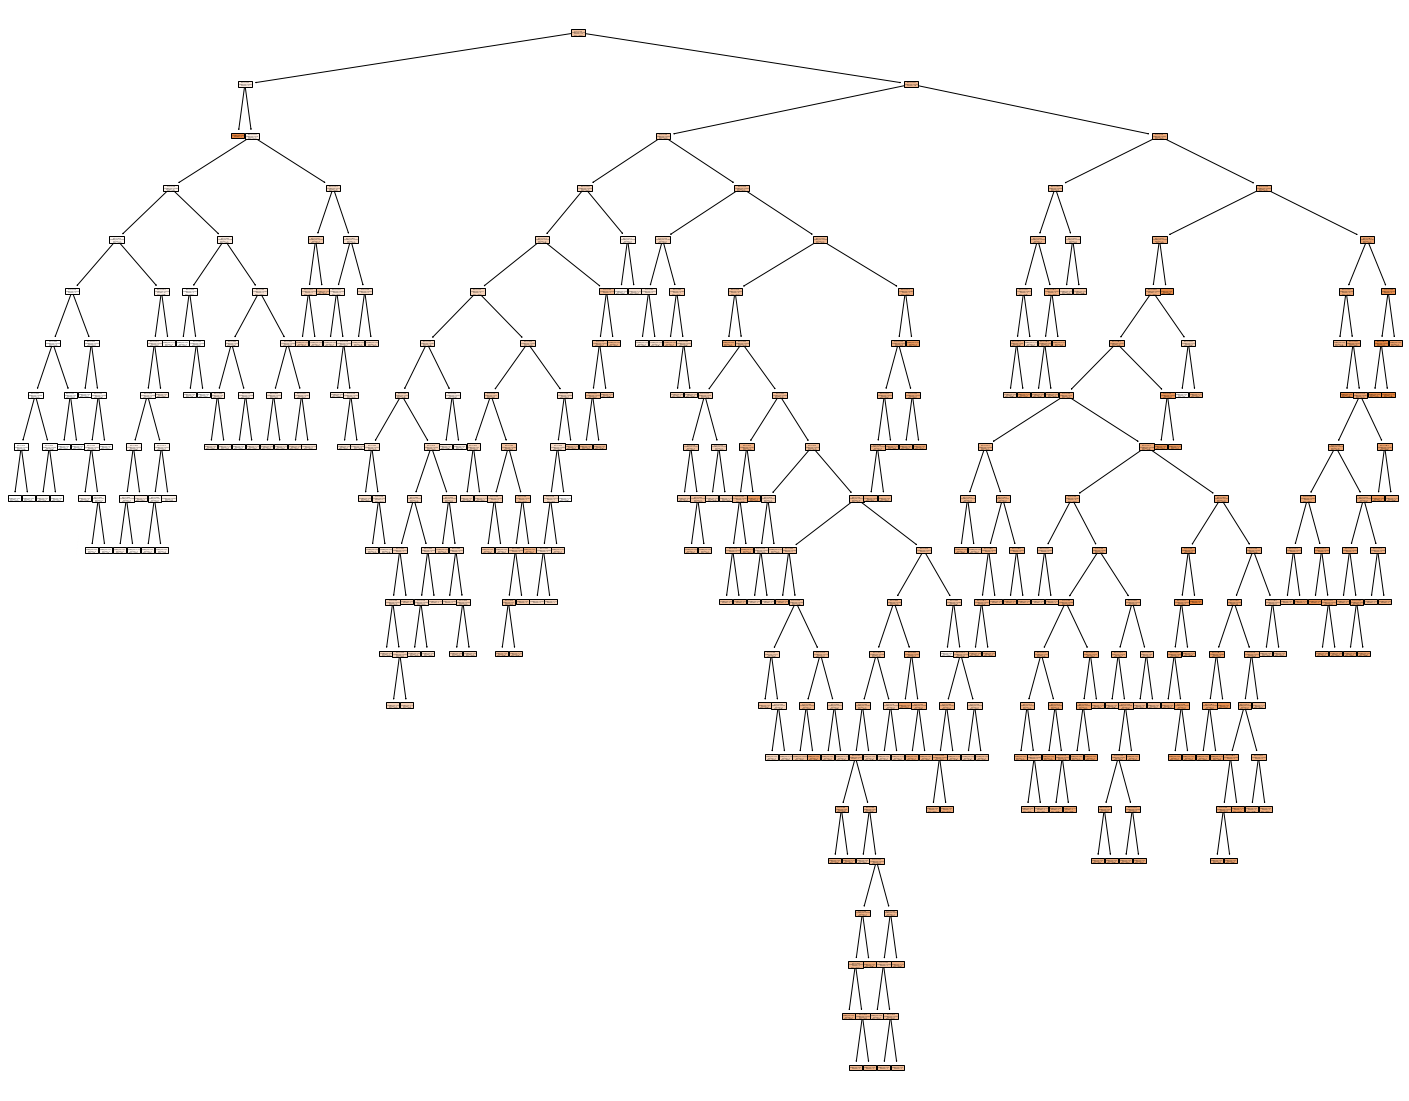

In [9]:
fig = plt.figure(figsize=(25 , 20))

_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

Yukarıdaki AĞAÇ **,** hiçbir şeyin okunamadığı kocaman bir ağaçtır... **İstediğimiz şey bu değil...**
<br> **Decision Tree**'yi **construct** ederken hiçbir parametre ve komut kullanmadığımız için **,** böyle ÇOK DERİN bir Ağaç oluştu... Yani neredeyse her bir Veri Noktası için bir **'split'** yaptı ve / veya bir **'leaf'** oluşturdu...
<br> Bu DEFAULT halde oluşturulan **Decision Tree ,** ÇOK BÜYÜK ihtimalle OVERFITTING ediyor...

**++++ NOTE ++++**
<br> **Yapraklar (leaves) ,** Karar ağacındaki EN ALT kısımlardır...

+ Bu Ağacın TEST Setindeki **performansına** bakalım **:**
<br> Önce bir **Tahminleme** yapalım **:**

In [6]:
y_pred = regressor.predict(X_test)
y_pred

array([6.05208917, 5.82894562, 6.90775528, 6.62007321, 5.29831737,
       5.29831737, 6.95017568, 4.31748811, 6.80239476, 5.37063803,
       4.49980967, 6.80239476, 6.03228734, 6.60665019, 6.80239476,
       4.49980967, 6.30991828, 6.24831943, 7.66262436, 5.04342512,
       5.85793315, 6.1737861 , 6.77422389, 5.04342512, 5.31073989,
       5.04342512, 6.24831943, 6.84587988, 4.60517019, 6.02827852,
       6.24831943, 6.06726751, 6.49602056, 6.50727771, 6.27287701,
       7.00306546, 5.768321  , 6.62007321, 4.62956527, 7.12084849,
       4.60517019, 5.70378247, 6.86693328, 7.00306546, 5.7889413 ,
       7.37775891, 4.91998093, 5.34710753, 5.37063803, 5.48063892,
       4.55387689, 4.90527478, 7.04751722])

In [7]:
comp = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})
comp.head()

,Actual,Predicted
126,6.214608,6.052089
13,6.551080,5.828946
207,6.551080,6.907755
221,5.347108,6.620073
68,4.653960,5.298317


+ Şimdi de **'MSE'** metriğine bakalım **:**

In [8]:
print('Mean Squared Error: ' , mean_squared_error(y_test , y_pred))

Mean Squared Error:  0.4099581129357284


**'MSE'** için çıkan bu sonuç iyi mi kötü mü tam anlayamıyoruz... Çünkü henüz bir karşılaştırma yapmadık... Bu durumda **, $R^{2}$**'ye bakmak daha mantıklı...

#### **``'Decision Tree Regressor'``** içerisinde neler varmış bir bakalım **:**

In [27]:
DecisionTreeRegressor()

DecisionTreeRegressor()

+ + DEFAULT **(criterion=mse)** komutu **:** Ağacı **'split'** yapıp **construct** ederken **, 'MSE'** kullanarak Ağacı **inşa ediyorum** diyor...
+  + DEFAULT **(splitter=best)** komutu **:** Her seferinde **,** bi **'split'** yaparken tek tek bütün Feature'lere bakıyorum ve **'MSE'**'yi EN FAZLA AZALTAN hangisi ise onu seçiyorum ve o şekilde **construct** ediyorum diyor...
+  + DEFAULT **(max_depth=None)** komutu **: 'max_depth'** koymadım diyor... Yani Ağacın maksimum derinliğinin ne kadar olacağını söylemiyorum diyor... **(max_depth=...)** parametresi ile oynayarak da Ağacı OVERFITTING ettirmeyebiliriz...
+ + + **+--- NOTE --->** Ağaçlar derinleştikçe OVERFITTING ihtimali ARTAR **!**
+ + DEFAULT **(min_samples_split=2)** komutu **: 'split'** yaparken **,** bir yere geldiğim zaman orada EN AZ **'2'** tane Veri Noktası varsa **;** orada da **'split'** yaparım diyor... Yani orada **'2'** nokta bile olsa **,** onları da ikiye bölerim diyor... Bu değeri ARTTIRARAK **,** OVERFITTING ihtimalini azaltabiliriz...
+ + DEFAULT **(min_samples_leaf=1)** komutu **:** Bir yaprak oluşturmak için de **;** EN AZ **'1'** Veri Noktası varsa orada da yaprak oluştururum diyor... Bu değeri de ARTTIRARAK **,** OVERFITTING ihtimalini azaltabiliriz...
+ + DEFAULT **(ccp_alpha=0.0)** komutu **:** Ağacı kurarken **,** Yaprak Sayısına **$(T)$** herhangi bir CEZA koymadım diyor... CEZA koyarak **,** OVERFITTING ihtimalini azaltabiliriz...
+ + ...... gibi gibi ...

+ Şimdi de **,** CEZA'yı (ALPHA)'yı birazcık arttırarak bir model kuralım... Yani Ağacın Yaprak Sayısını **$(T)$** biraz CEZALANDIRARAK bir model kuralım **:**

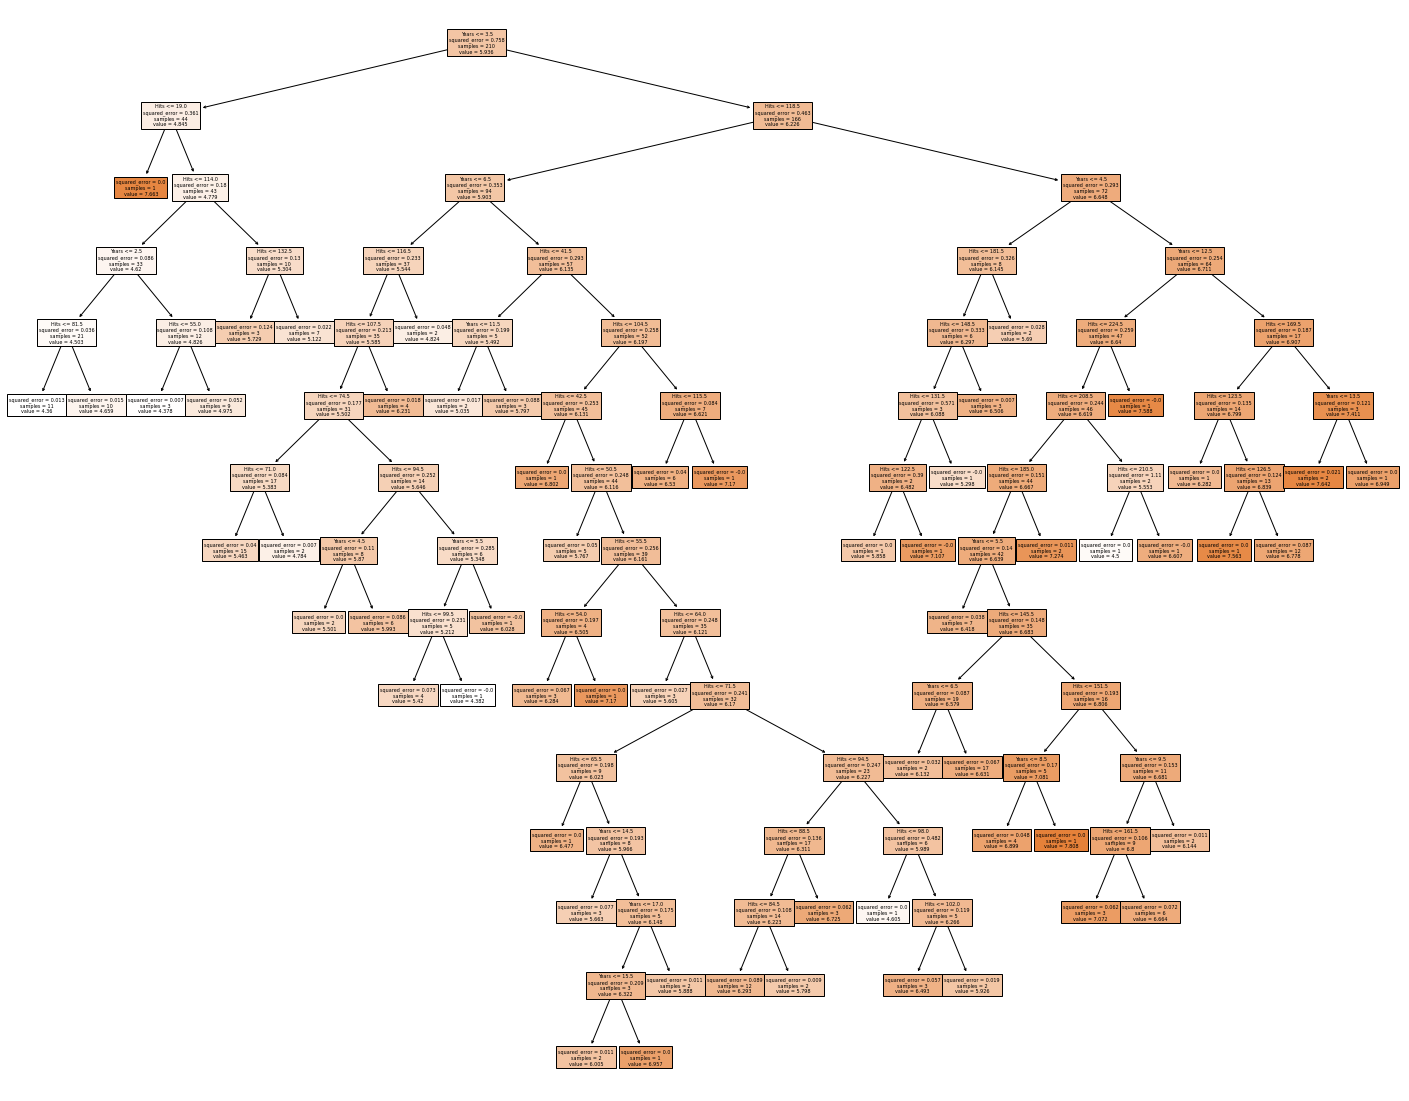

In [32]:
regressor = DecisionTreeRegressor(random_state=0 , ccp_alpha=0.0015)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

y_pred = regressor.predict(X_test)

In [29]:
print('Mean Squared Error:' , mean_squared_error(y_test , y_pred))

Mean Squared Error: 0.45947010337704997


**++++ NOTE ++++**
<br> **Yapraklar (leaves) ,** Karar ağacındaki EN ALT kısımlardır...

**++++ CRITICAL NOTE ++++**
<br> Yukarılarda fark ettiysek **;** her defasında TEST Setine TEKRAR TEKRAR bakarak **Tahminlemeler** yapıyoruz... Normalde böyle bir şeyi ASLA **yapmamamız lazım...** Ama burada Ağaçları görmek ve CEZA'yı anlamak için böyle bir uygulama yapıyoruz...

+ CEZA'yı biraz daha arttıralım **:**

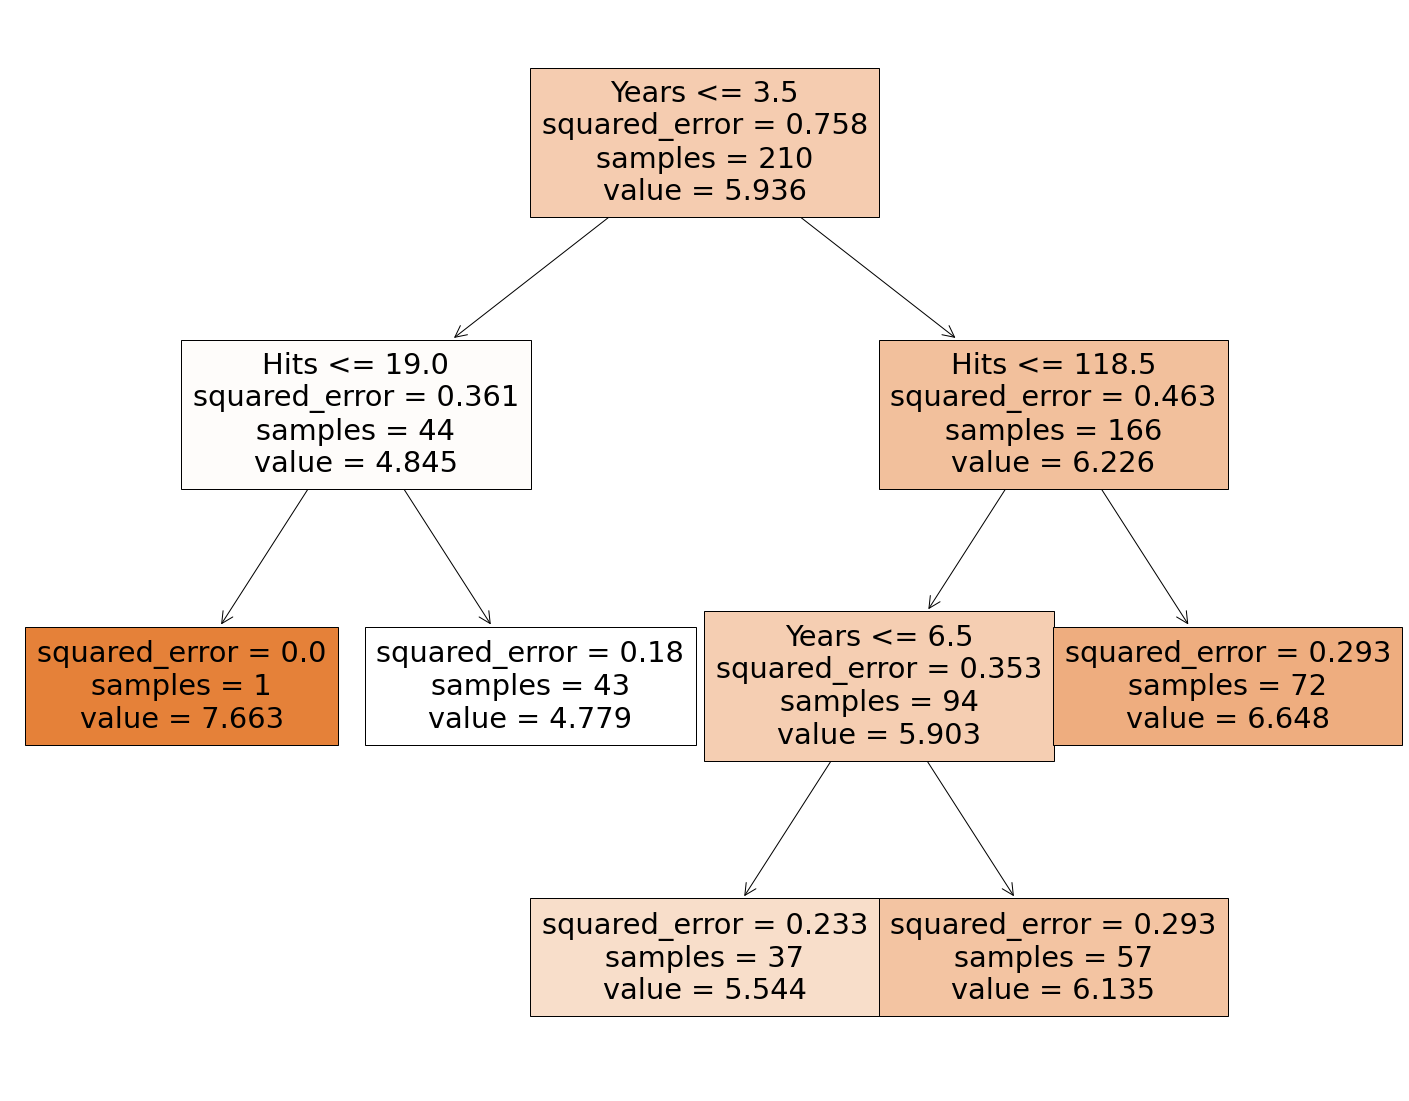

In [33]:
regressor = DecisionTreeRegressor(random_state = 0 , ccp_alpha=0.02)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

+ **Yukarıdaki Karar Ağacını artık yorumlayabiliriz... :**

+ + **Years , '3.5'**'in ALTINDA ise ve **'Hit'** sayısı da **'19'**'un ALTINDA ise **LOG Maaş (value)** olarak **'7.663'** döndürüyorum diyor...
+ + **Years** yine **, '3.5'**'in ALTINDA ise ama **'Hit'** sayısı **'19'**'un ÜSTÜNDE ise **LOG Maaş (value)** olarak **'4.779'** döndürüyorum diyor...

+ + **Years , '3.5'**'in ÜSTÜNDE ise ve **'Hit'** sayısı da **'118.5'**'in ALTINDA ise **LOG Maaş (value)** olarak **'5.903'** döndürüyorum diyor...
+ + **Years** yine **, '3.5'**'in ÜSTÜNDE ise ve **'Hit'** sayısı da **'118.5'**'in ÜSTÜNDE ise **LOG Maaş (value)** olarak **'6.648'** döndürüyorum diyor...
+ + ...... gibi gibi ...

Peki yukarıdaki **yapraklardan birinde (leaf) , 'squared error (MSE)'** neden **'0' ?**
<br> Çünkü o yaprakta tek bir Veri Noktası **(samples=1)** olduğu için herhangi bir hata payı da olmuyor...

Peki bir yanındaki **yaprakta (leaf) , 'squared error (MSE)'** neden **'0.18' ?**
<br> Model **; 'Years'**'i **'3.5'**'in ALTINDA ve **'Hit'** sayısı **'19'**'un ÜSTÜNDE olan **'43'** tane Veri Noktası görmüş... Ve bunların **Ortalaması** üzerinden **her bir** Veri Noktasını **karşılaştırmış** ve **'MSE'**'yi **'0.18'** olarak bulmuş...

+ TEST Veri Setini görelim **:**

In [37]:
X_test.head()

,Hits,Years
126,78,5
13,60,6
207,148,13
221,167,4
68,142,4


+ **TEST Veri Seti ile Tahminleme** yapıp **,** tahmini **'y' (Target)** değerlerini görelim **:**

In [36]:
regressor.predict(X_test)

array([5.54409274, 5.54409274, 6.64784191, 6.64784191, 6.64784191,
       4.77916672, 6.64784191, 4.77916672, 6.64784191, 4.77916672,
       4.77916672, 6.64784191, 6.13547013, 6.64784191, 6.64784191,
       4.77916672, 6.64784191, 6.64784191, 7.66262436, 4.77916672,
       6.64784191, 4.77916672, 6.13547013, 4.77916672, 4.77916672,
       4.77916672, 6.64784191, 6.64784191, 6.13547013, 5.54409274,
       6.64784191, 5.54409274, 6.64784191, 5.54409274, 6.64784191,
       6.13547013, 6.13547013, 6.64784191, 4.77916672, 6.64784191,
       4.77916672, 4.77916672, 6.64784191, 6.13547013, 6.13547013,
       6.64784191, 4.77916672, 5.54409274, 4.77916672, 6.13547013,
       4.77916672, 4.77916672, 6.64784191])

+ Yukarıdaki **Karar Ağacını** kullanıp **,** TEST Setini bu Karar Ağacına yollarsak **;** ve TEST Setine Tahminleme yaptırıp GERÇEK Veri Seti ile de **karşılaştırırsak** ne kadar **hata** yapmış oluruz **? :**

In [39]:
y_pred = regressor.predict(X_test)

print('Mean Squared Error:' , mean_squared_error(y_test , y_pred))

Mean Squared Error: 0.4039701588801692


+ CEZA'yı biraz daha arttıralım **:**

[Text(0.4, 0.8333333333333334, 'Years <= 3.5\nsquared_error = 0.758\nsamples = 210\nvalue = 5.936'),
 Text(0.2, 0.5, 'squared_error = 0.361\nsamples = 44\nvalue = 4.845'),
 Text(0.6, 0.5, 'Hits <= 118.5\nsquared_error = 0.463\nsamples = 166\nvalue = 6.226'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.353\nsamples = 94\nvalue = 5.903'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.293\nsamples = 72\nvalue = 6.648')]

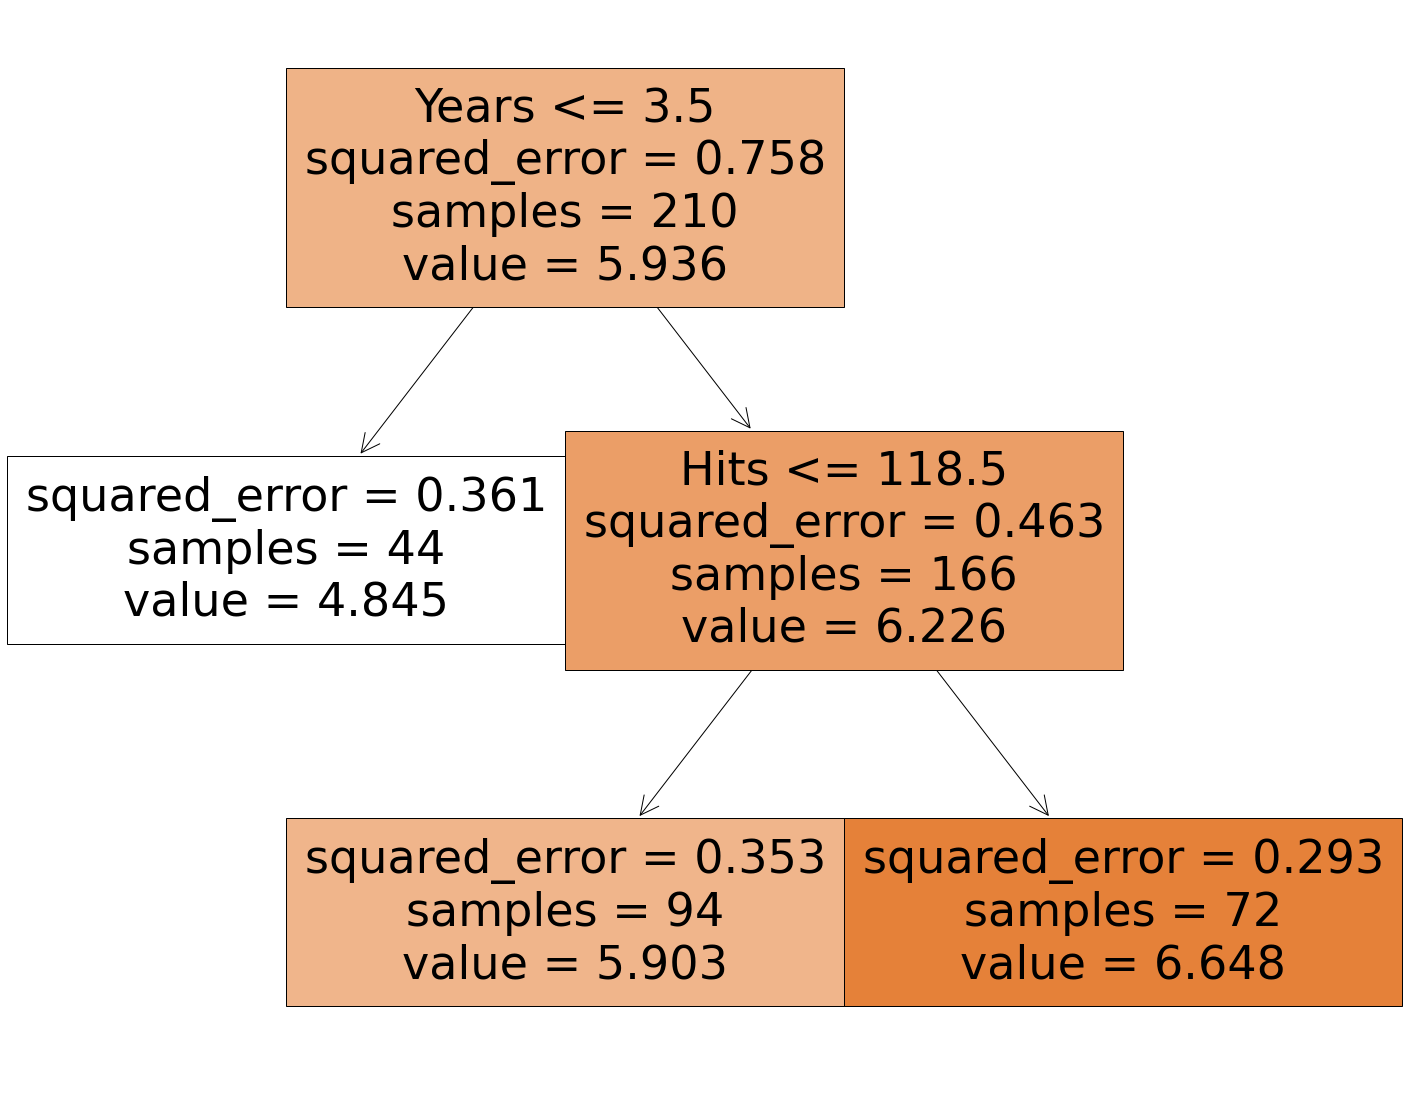

In [49]:
regressor = DecisionTreeRegressor(ccp_alpha=0.09)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)
_

**+--- NOTE --->** Yani aslıda **,** biz CEZA'yı arttırdıkça Ağaç yukarıya doğru BUDANIYOR... Yani **'pruning'** yapılıyor... Yani Ağaç küçülüyor...

+ CEZA'yı iyice arttıralım **:**

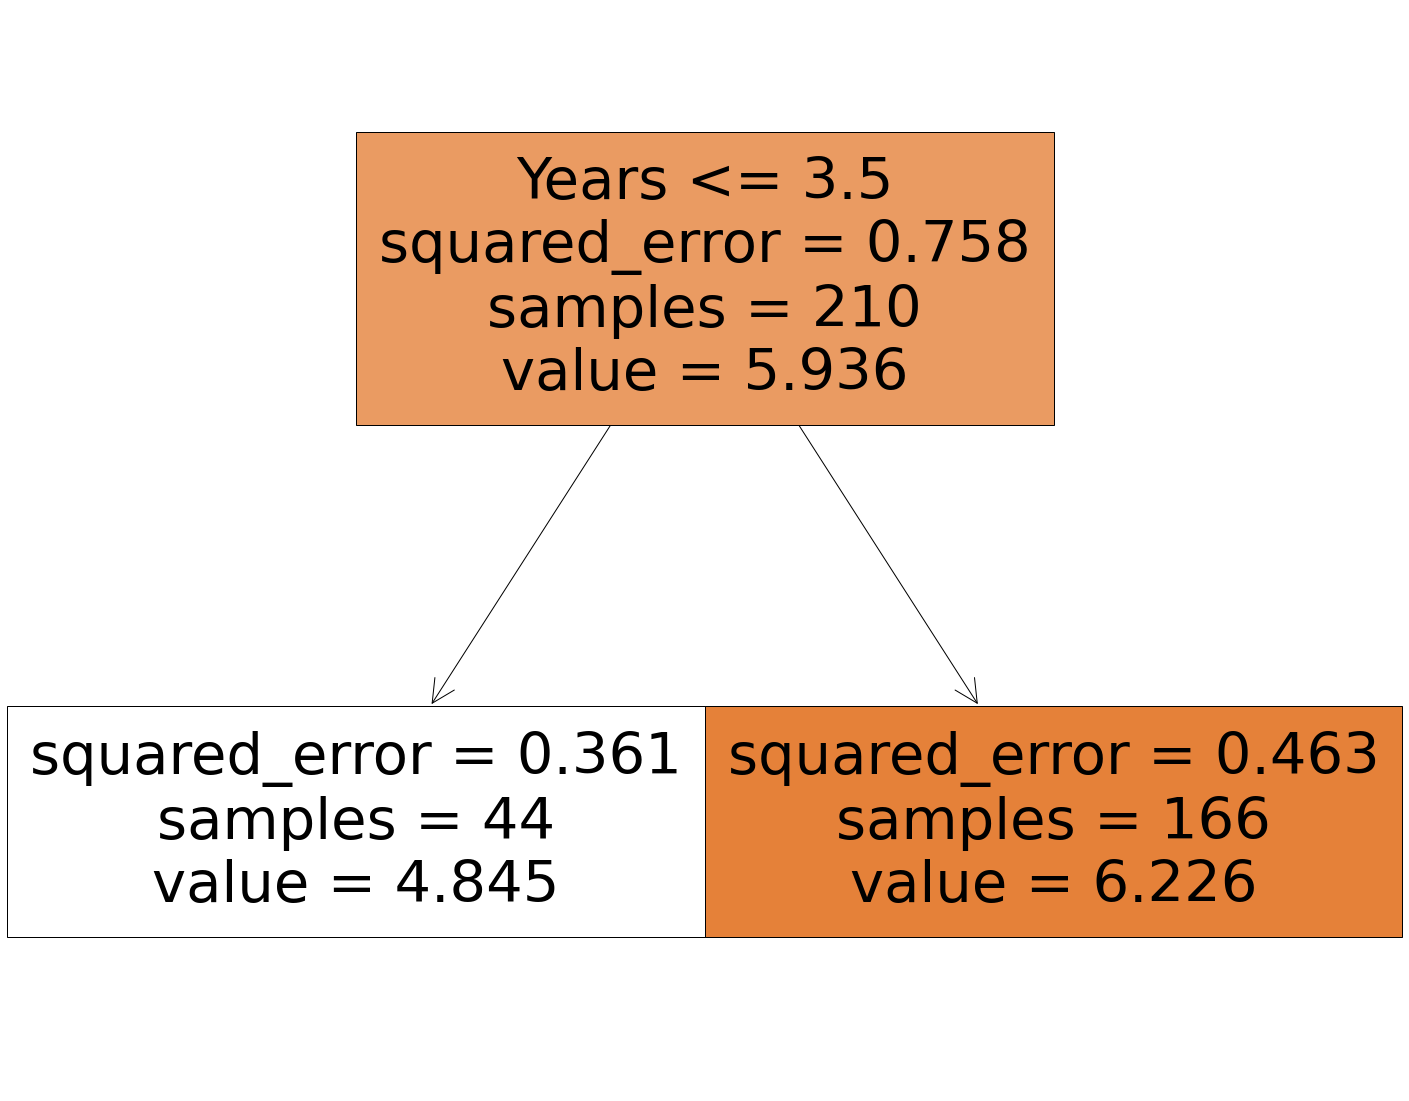

In [48]:
regressor = DecisionTreeRegressor(ccp_alpha=0.2)  

regressor.fit(X_train , y_train) 

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

+ Şimdi de ALPHA ile CEZA vererek DEĞİL DE **,** Ağacın DERİNLİĞİNİ ayarlayarak **'pruning (budama)'** yapmaya çalışalım ve OVERFITTING'in de önüne bu şekilde geçmeye çalışalım **:**
<br> **+--- NOTE ---> Pruning (Budama)** yapmak için İlk olarak **, (max_depth=2)** Parametresini kullanacağız...

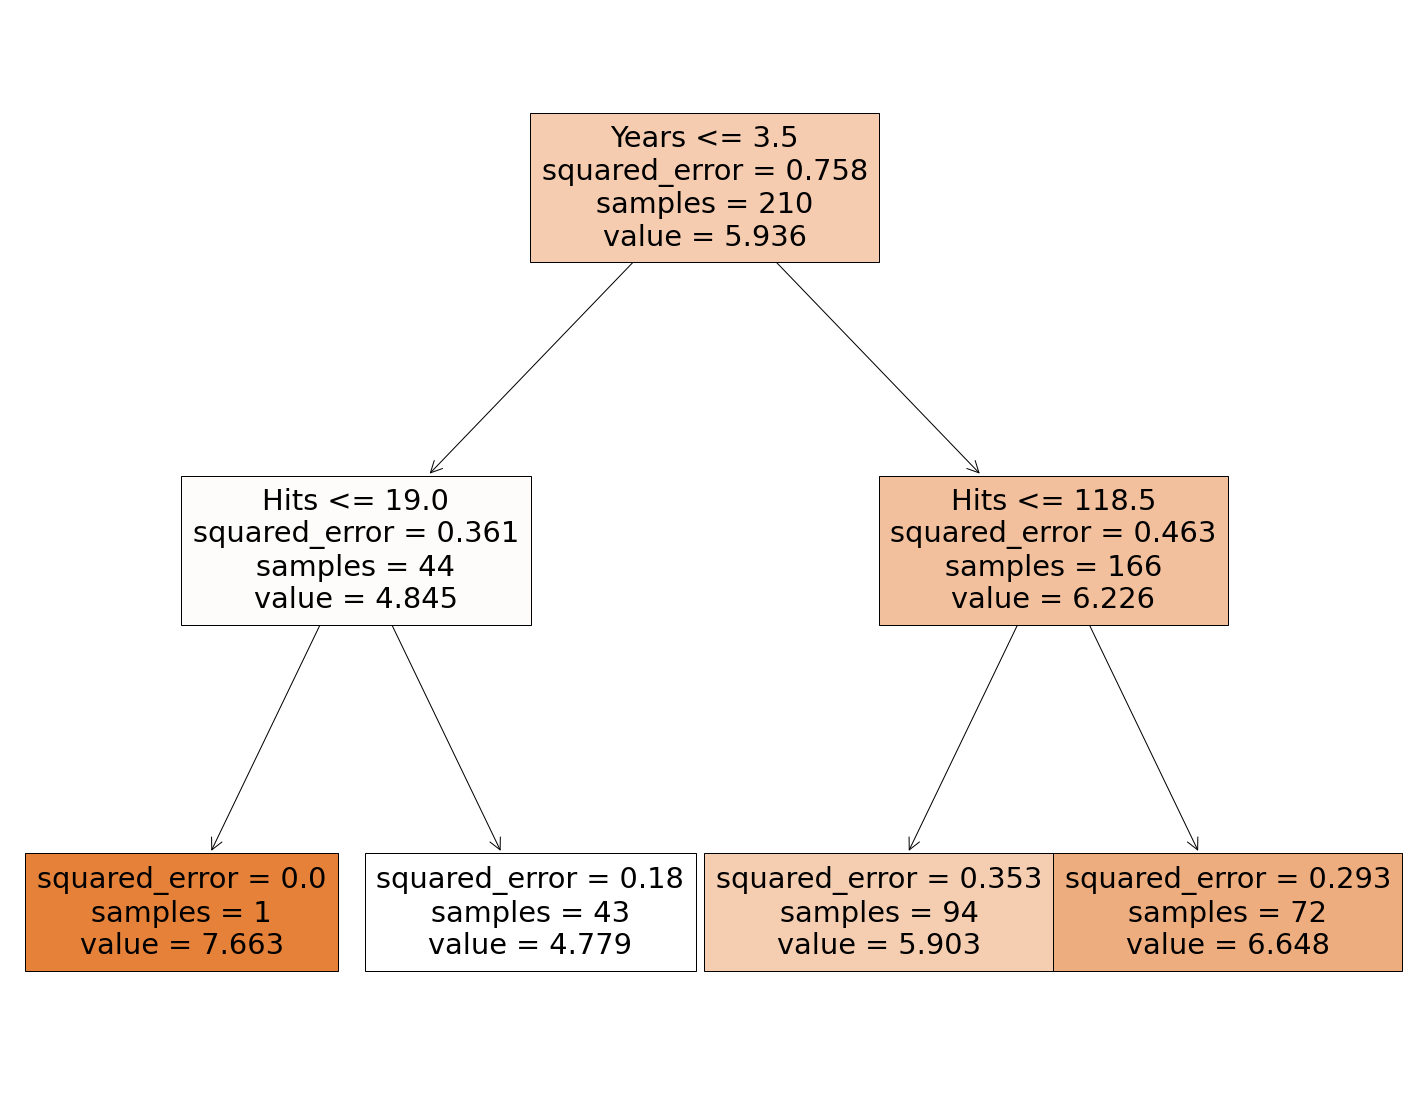

In [53]:
regressor = DecisionTreeRegressor(max_depth=2)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

Yukarıda gördüğümüz gibi **,** Karar Ağacımızın MAX DERİNLİĞİ **'2'** olacak şekilde **construct** edildi...

Ve tabiki **'pruning'** işlemini **,** BAŞKA PARAMETRELER ile de gerçekleştirebiliriz...

**++++ CRITICAL NOTE ++++**
<br> Karar Ağacını **nereden budamamız gerektiğine** karar verirken **; 'Square Error'**'un **,** bir alt **Dala** geçtiğimizde **ne kadar değiştiğine de** bakabiliriz... Yani bir alt **Dala** geçtiğimizde **'MSE'** çok azalmıyorsa **,** Karar Ağacını oradan budayabiliriz...

**++++ NOTE ++++**
<br>  **Tahminlemeyi ,** Ağacın en dibinde yani **Yapraklarında** yapıyoruz...

---
---
---

## **Decision Tree Regressor** with **``'K-Fold'``** and **``'Cross Validation'`` :**
+ Şimdi de **10-fold** ile **Cross Validation** yapalım ve beraberinde farklı ALPHA değerlerini deneyelim **:**
<br> **Cross Validation**'u **'cross_val_score'** modülünü ÇAĞIRMADAN **,** tek tek **Cross Validation**'un nasıl uygulandığını görerek yapalım **:**

**+--- NOTE ---> (shuffle=True)** Parametresi ile **,** Veri Setini parçalamadan önce **karıştırmış (çalkalamış)** oluyoruz...

In [9]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10 , random_state=10 , shuffle=True)

CVErrors=[]

alphas = np.linspace(0 , 0.5 , num=1000)

for i in alphas:
    for train_index , validation_index in cv.split(X_train):
        X_trainp , X_valid = X_train.iloc[train_index] , X_train.iloc[validation_index]
        y_trainp , y_valid = y_train.iloc[train_index] , y_train.iloc[validation_index]
        regressor = DecisionTreeRegressor(ccp_alpha=i)
        regressor.fit(X_trainp , y_trainp)
        y_pred = regressor.predict(X_valid)
        CVErrors.append([i , mean_squared_error(y_trainp , regressor.predict(X_trainp)) ,
                         mean_squared_error(y_valid, y_pred)])
        
df = pd.DataFrame(CVErrors , columns=['alpha' , 'Training Error' , 'Validation Error'])

In [10]:
df

,alpha,Training Error,Validation Error
0,0.0,0.001909,0.229641
1,0.0,0.002828,0.747169
2,0.0,0.003523,0.497721
3,0.0,0.003382,0.230207
4,0.0,0.003523,0.477117
...,...,...,...
9995,0.5,0.781295,0.549818
9996,0.5,0.760440,0.734843
9997,0.5,0.774354,0.610697
9998,0.5,0.737434,0.945398


In [ ]:
pd.set_option("display.max_rows" , 10000)
df

+ HER BİR 'ALPHA' değeri için GRUPLAMA yapalım **:**

In [12]:
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha.sort_values('Validation Error' , ascending=True)

,alpha,Training Error,Validation Error
54,0.027027,0.261278,0.332201
53,0.026527,0.261278,0.332201
52,0.026026,0.261278,0.332201
44,0.022022,0.258687,0.339459
47,0.023524,0.258687,0.339459
...,...,...,...
678,0.339339,0.685171,0.803987
677,0.338839,0.685171,0.803987
676,0.338338,0.685171,0.803987
693,0.346847,0.685171,0.803987


+ Şimdi de bu tabloyu çizdirelim **:**

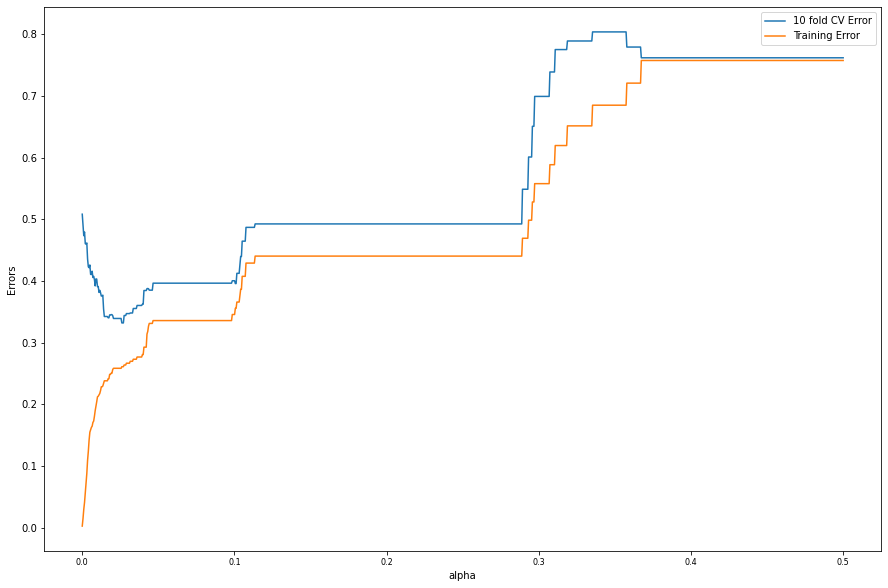

In [13]:
fig = plt.figure(figsize=(15 , 10))
ax = fig.add_subplot(1 , 1 , 1)
ax.plot(kfoldCV_by_alpha['alpha'].values, kfoldCV_by_alpha['Validation Error'].values, label = '10 fold CV Error')
ax.plot(kfoldCV_by_alpha['alpha'].values, kfoldCV_by_alpha['Training Error'].values, label = 'Training Error')
ax.set_xlabel('alpha')
ax.set_ylabel('Errors')
ax.tick_params(axis='x' , labelsize=8)
ax.legend(loc='best')

+ Şimdi de **,** EN İYİ 'ALPHA' değerini kullanarak EN BAŞTAN **modeli kuralım , Tahminleme** yapalım ve **'MSE'**'ye bakalım **:**

Mean Squared Error: 0.4039701588801692


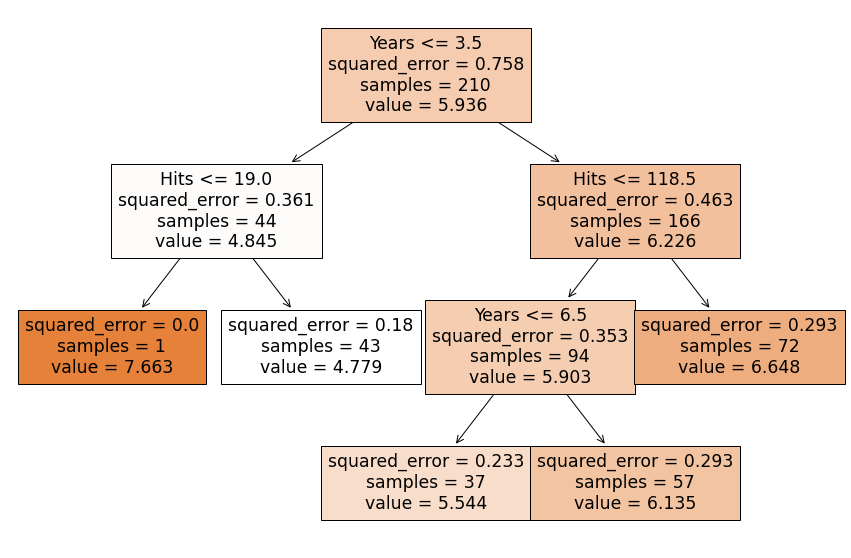

In [14]:
regressor = DecisionTreeRegressor(ccp_alpha=0.026026)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(15 , 10))
_ = tree.plot_tree(regressor , feature_names=['Hits', 'Years'] , filled=True)

y_pred = regressor.predict(X_test)

print('Mean Squared Error:' , mean_squared_error(y_test , y_pred))

+ Şimdi de **'cross_val_score'** modülünü çağırarak **,** daha kolay bir şekilde yapalım **:**

In [30]:
from sklearn.model_selection import cross_val_score

alphas = np.linspace(0 , 0.5 , num=1000)

CVErrors = []

for i in alphas:
    regressor = DecisionTreeRegressor(ccp_alpha=i)
    
    Errors = cross_val_score(regressor , X_train , y_train , scoring="neg_mean_squared_error" , cv=10)
    
    #    Her bir 'ALPHA' değeri için '10' tane 'KFold' yaptığımızdan dolayı ; her bir 'ALPHA' değeri için olan
    # 'KFold' hatalarının 'Ortalamalarını' almalıyız:
    #    '-1' ile çarpmamızın sebebi de, yukarıda 'scoring=...' olarak 'MSE''nin Negatifini çağırmamızdır...
    # Tekrar Pozitif hale çeviriyoruz... :
    #    Ortalama alma işlemi sayesinde de 'GROUPBY' işlemi yapmamıza gerek kalmıyor... :
    CVErrors.append([i , -1 * np.mean(Errors)])
    
    df = pd.DataFrame(CVErrors , columns=['alpha' , 'Validation Error'])
df

,alpha,Validation Error
0,0.000000,0.509050
1,0.000501,0.499985
2,0.001001,0.473976
3,0.001502,0.487960
4,0.002002,0.489471
...,...,...
995,0.497998,0.761569
996,0.498498,0.761569
997,0.498999,0.761569
998,0.499499,0.761569


In [16]:
kfoldCV_by_alpha = df.sort_values(by=['Validation Error'] , ascending=True)
kfoldCV_by_alpha

,alpha,Validation Error
48,0.024024,0.328909
46,0.023023,0.328909
42,0.021021,0.328909
43,0.021522,0.328909
47,0.023524,0.328909
...,...,...
675,0.337838,0.785504
674,0.337337,0.785504
673,0.336837,0.785504
671,0.335836,0.785504


+ Şimdi de **,** EN İYİ 'ALPHA' değerini kullanarak EN BAŞTAN **modeli kuralım , Tahminleme** yapalım ve **'MSE'**'ye bakalım **:**

Mean Squared Error: 0.4039701588801692


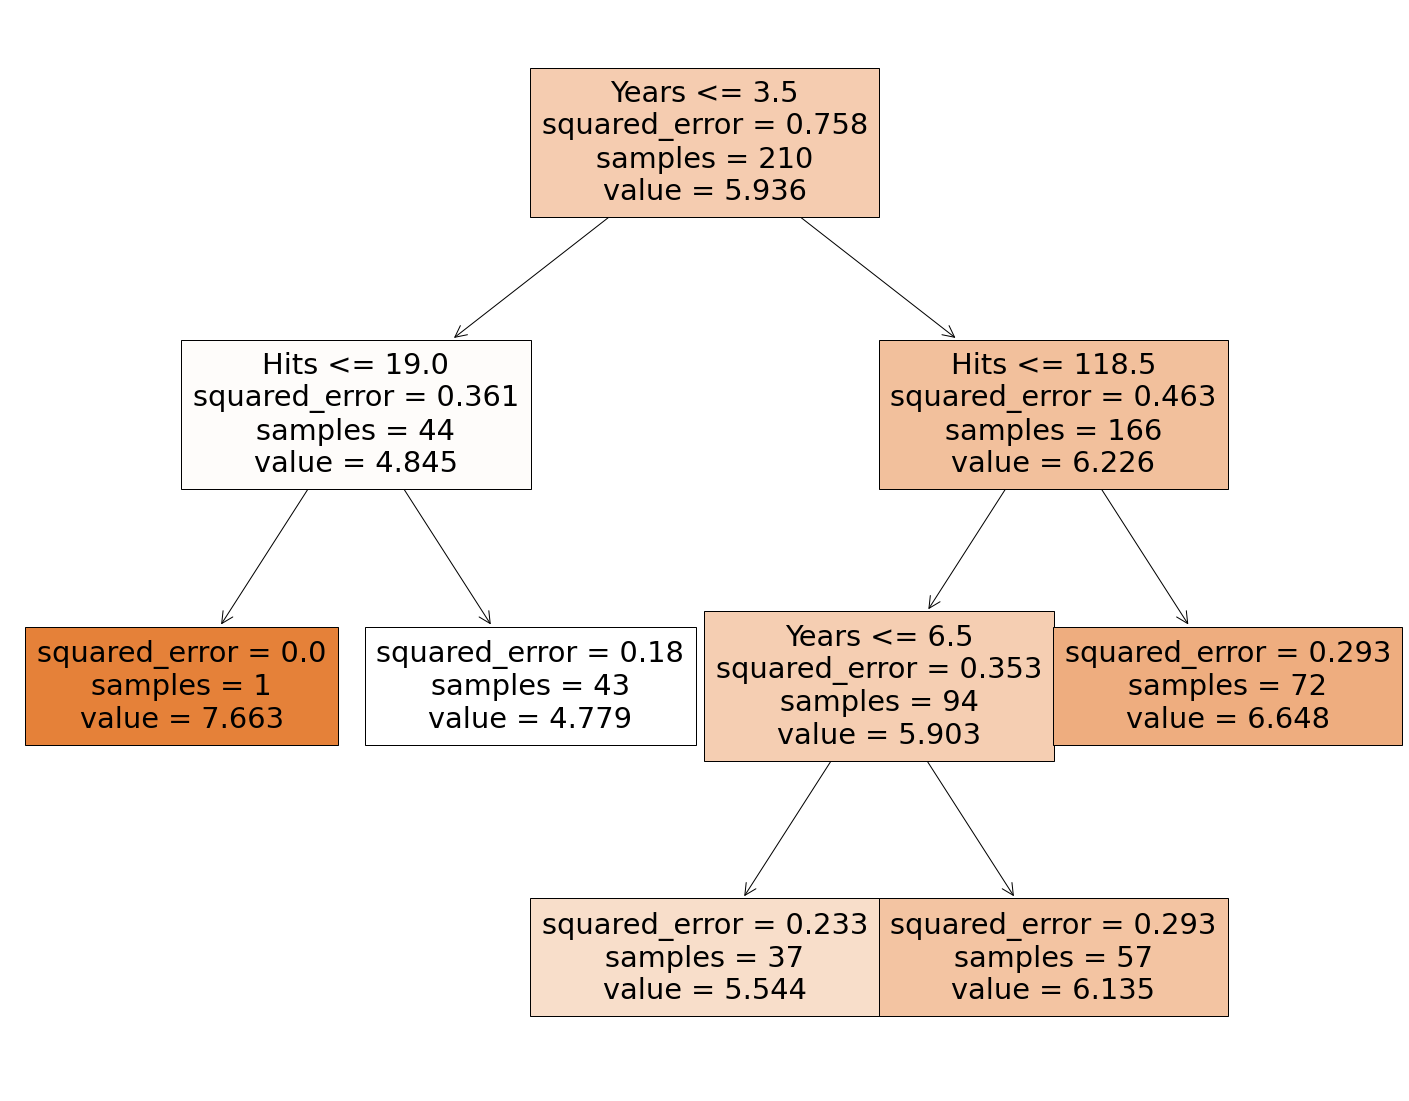

In [18]:
regressor = DecisionTreeRegressor(ccp_alpha=0.024024)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

y_pred = regressor.predict(X_test)

print('Mean Squared Error:' , mean_squared_error(y_test , y_pred))

+ Yukarıda kullandığımız **'ccp_alpha'** değerini görelim **:**

In [22]:
regressor.ccp_alpha

0.024024

**+--- NOTE --->** Küçük 'ALPHA' (CEZA) değişimleri **,** Karar Ağacımızda pek bir değişiklik yapmaz...

+ ASLINDA bu 'ALPHA' değerlerini bizim belirlememize de gerek yok... **'Scikit-Learn'** bizim için bu işlemi gerçekleştiriyor... Yapmamız gereken şey **;** yarattığımız Karar Ağacında ``'.cost_complexity_pruning_path( , )'`` fonksiyonunu çağırarak FIT etme (Eğitim) işlemi gibi bir işlem yaparsak **, 'Scikit-Learn'** bize farklı 'ALPHA' değerleri oluşturuyor...
<br> **Scikit-Learn** bu fonksiyon ile **;** bir çok 'ALPHA' değerini deneyerek **,** en kullanılabilir olan 'ALPHA' değerlerini bize gösteriyor **:**
<br> Biz de bu 'ALPHA' değerleri üzerinden işlemlerimizi gerçekleştirebiliriz **:**

In [19]:
path = regressor.cost_complexity_pruning_path(X_train , y_train)
path

{'ccp_alphas': array([0.00000000e+00, 3.38353684e-17, 6.76707367e-17, 1.35341473e-16,
        5.48528699e-07, 7.45923029e-07, 9.69040174e-07, 1.11719153e-06,
        1.33922294e-06, 1.52617000e-06, 1.88951978e-06, 2.73646478e-06,
        3.54237964e-06, 3.87682150e-06, 3.96770294e-06, 6.53808516e-06,
        6.96015337e-06, 7.49054350e-06, 7.77877208e-06, 8.08396584e-06,
        9.11563235e-06, 9.28020449e-06, 1.05898558e-05, 1.13333722e-05,
        1.24530431e-05, 1.46614153e-05, 1.47453493e-05, 1.80261422e-05,
        2.58990808e-05, 2.59309829e-05, 2.64305673e-05, 2.90155095e-05,
        3.36974978e-05, 3.43324483e-05, 3.60406715e-05, 3.63320455e-05,
        3.95182893e-05, 4.01900458e-05, 4.04024309e-05, 4.24538877e-05,
        4.41237354e-05, 4.57288682e-05, 4.84543334e-05, 4.91230848e-05,
        5.09187876e-05, 5.11728063e-05, 5.27637303e-05, 6.64453981e-05,
        6.99820764e-05, 7.28124067e-05, 7.91455954e-05, 8.52679391e-05,
        8.69097702e-05, 9.05184928e-05, 9.21629492

+ Şimdi de **,** yukarıda **Scikit-Learn**'ın otomatik oluşturduğu **'ccp_alphas'** değerlerini kullanalım **:**
<br> **'cross_val_score'** modülünü KULLANMADAN , FOR döngüsü içerisinde **, Cross Validation**'un kullanımını anlayarak yapalım **:**

In [23]:
cv = KFold(n_splits=10 , random_state=10 , shuffle=True)

CVErrors=[]

for i in path.ccp_alphas:
    for train_index , validation_index in cv.split(X_train):
        X_trainp , X_valid = X_train.iloc[train_index] , X_train.iloc[validation_index]
        y_trainp , y_valid = y_train.iloc[train_index] , y_train.iloc[validation_index]
        regressor = DecisionTreeRegressor(ccp_alpha=i)
        regressor.fit(X_trainp , y_trainp) 
        y_pred = regressor.predict(X_valid)
        CVErrors.append([i, mean_squared_error(y_trainp, regressor.predict(X_trainp)), mean_squared_error(y_valid, y_pred)])
        
df = pd.DataFrame(CVErrors , columns=['alpha' , 'Training Error' , 'Validation Error'])

kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha.sort_values(by=['Validation Error'] , ascending=True)

,alpha,Training Error,Validation Error
149,1.710270e-02,0.241739,0.340532
150,3.736447e-02,0.276958,0.360538
151,3.869222e-02,0.276958,0.360538
147,1.079210e-02,0.215505,0.381696
148,1.082811e-02,0.215505,0.381696
...,...,...,...
2,6.767074e-17,0.002877,0.513539
4,5.485287e-07,0.002877,0.514789
40,4.412374e-05,0.003384,0.514901
22,1.058986e-05,0.002961,0.515978


+ Şimdi de **,** EN İYİ 'ALPHA' değerini kullanarak EN BAŞTAN **modeli kuralım , Tahminleme** yapalım ve **'MSE'**'ye bakalım **:**

Mean Squared Error: 0.3646950376419074


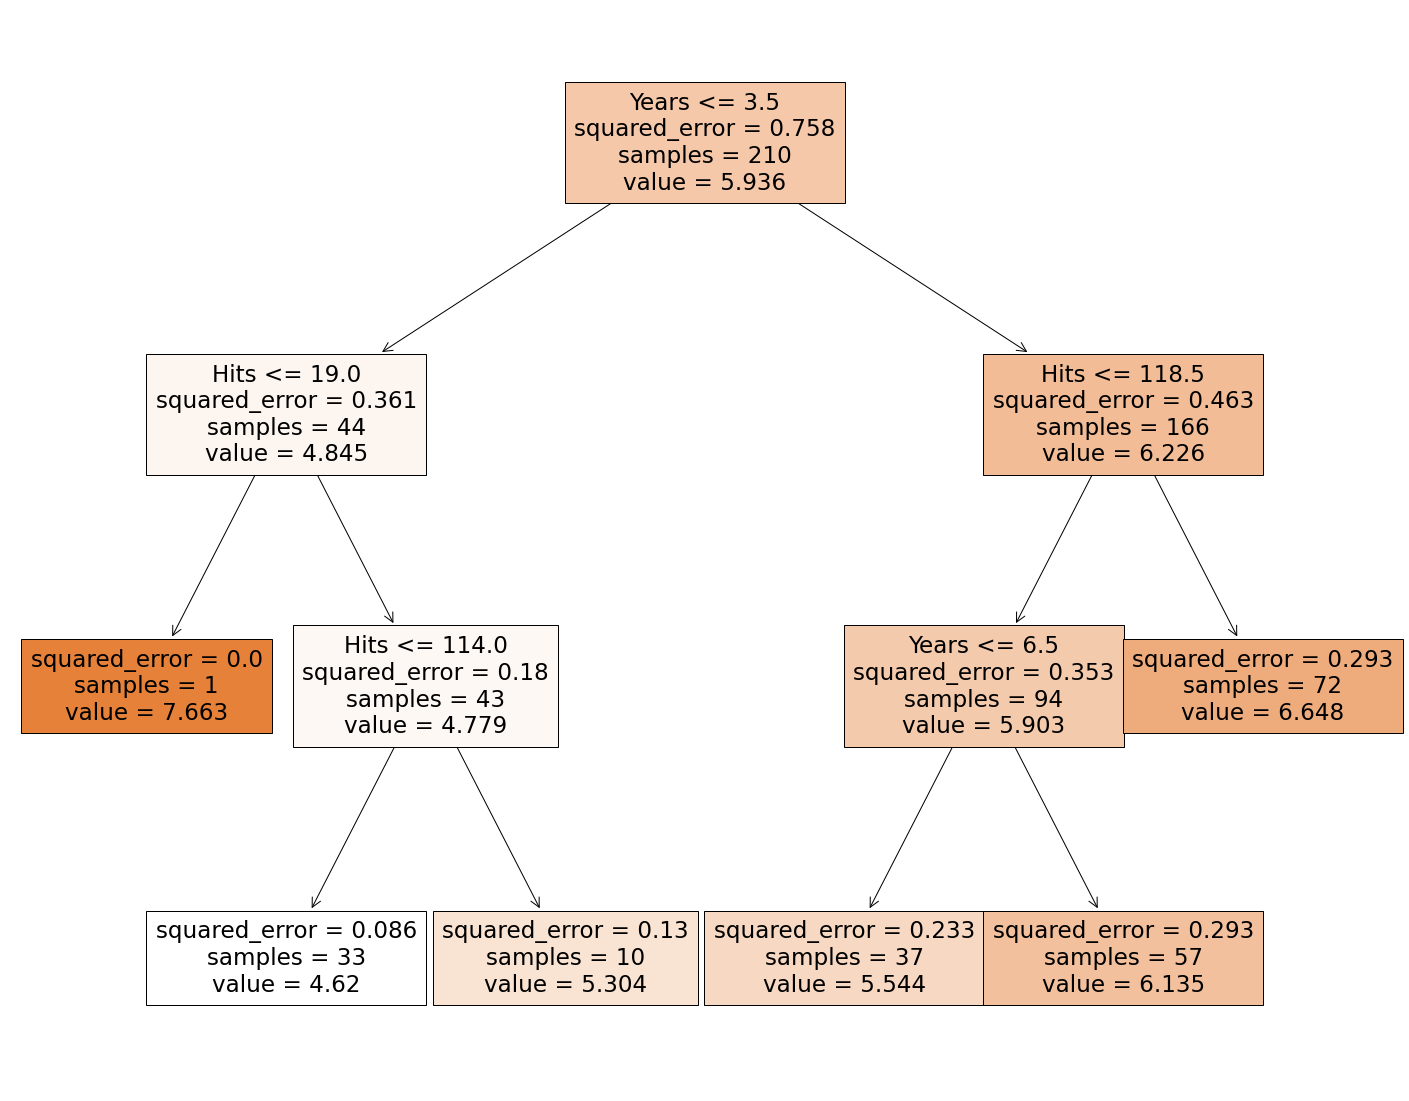

In [24]:
regressor = DecisionTreeRegressor(random_state = 0 , ccp_alpha=1.710270e-02)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

y_pred = regressor.predict(X_test)

print('Mean Squared Error:' , mean_squared_error(y_test , y_pred))

+ Aynısını bir de **'cross_val_skore'** modülünü kullanarak daha kolay bir şekilde yapalım **:**

In [31]:
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10 , shuffle=True, random_state=10)

CVErrors = []

for i in path.ccp_alphas:
    regressor = DecisionTreeRegressor(ccp_alpha=i)
    Errors = cross_val_score(regressor , X_train , y_train , scoring='neg_mean_squared_error' , cv=10)
    CVErrors.append([i , -1 * np.mean(Errors)])
    df = pd.DataFrame(CVErrors , columns=['Alpha' , 'Validation Errors'])

df.sort_values('Validation Errors' , ascending=True)

,Alpha,Validation Errors
149,0.017103,0.342901
150,0.037364,0.358095
147,0.010792,0.361085
148,0.010828,0.361085
151,0.038692,0.361087
...,...,...
44,0.000051,0.520850
77,0.000194,0.520950
15,0.000007,0.525529
40,0.000044,0.526702


In [ ]:
regressor = DecisionTreeRegressor(random_state = 0 , ccp_alpha=0.017103)

regressor.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(regressor , feature_names=['Hits' , 'Years'] , filled=True)

y_pred = regressor.predict(X_test)

print('Mean Squared Error:' , mean_squared_error(y_test , y_pred))

---
---
---

## **Diabetes Data** with **'``Decision Tree Classifier``' :**

In [11]:
#   Read in the data using Pandas :
df = pd.read_table('diabetesdata.txt')
#   Check data has been read in properly :
df

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **'Diabetes' Veri Setindeki kolonlar SIRASI ile :**
+ **Preg = Pregnancies =** Gebelikler.
+ **Glucose =** Glukoz.
+ **BP = Blood Pressure =** Tansiyon.
+ **SkinThick = Skin Thickness =** Cilt kalınlığı.
+ **Insul =** Insulin.
+ **BMI = Body Mass Index =** Vücut Kitle İndeksi.
+ **DPF = Diabetes Pedigree Function =** Diyabetin Soyağacı Fonksiyonu.
+ **Age =** Yaş.
+ **Diabetes =** Diyabet mi? Değil mi?

+ Sadece **'Glucose'** ve **'BMI'** Featurelerini kullanarak çalışalım **:**

In [12]:
X = df[['Glucose' , 'BMI']]
y = df['Diabetes']

In [4]:
X.head(2)

,Glucose,BMI
0,148,33.6
1,85,26.6


In [13]:
#   Split data into TRAINING and TEST sets :
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

#### **``'Decision Tree Classifier'``** içerisindeki **parametreleri** ve **metodları** inceleyelim **:**

In [41]:
DecisionTreeClassifier()

DecisionTreeClassifier()

+ + DEFAULT **(criterion=gini)** komutu **:** Ağacı **'split'** yapıp **construct** ederken **, 'GINI' Index** kullanarak Ağacı **inşa ediyorum** diyor... Bunu değiştirip **'entropy'** metriğini de kullanabiliriz...
+  + DEFAULT **(splitter=best)** komutu **:** Her seferinde **,** bi **'split'** yaparken tek tek bütün Feature'lere bakıyorum ve **'GINI' Index**'i veya **'entropy'**'i EN FAZLA AZALTAN hangisi ise onu seçiyorum ve o şekilde **construct** ediyorum diyor...
+  + DEFAULT **(max_depth=None)** komutu **: 'max_depth'** koymadım diyor... Yani Ağacın maksimum derinliğinin ne kadar olacağını söylemiyorum diyor... **(max_depth=...)** parametresi ile oynayarak da Ağacı OVERFITTING ettirmeyebiliriz...
+ + + **+--- NOTE --->** Ağaçlar derinleştikçe OVERFITTING ihtimali ARTAR **!**
+ + DEFAULT **(min_samples_split=2)** komutu **: 'split'** yaparken **,** bir yere geldiğim zaman orada EN AZ **'2'** tane Veri Noktası varsa **;** orada da **'split'** yaparım diyor... Yani orada **'2'** nokta bile olsa **,** onları da ikiye bölerim diyor... Bu değeri ARTTIRARAK **,** OVERFITTING ihtimalini azaltabiliriz...
+ + DEFAULT **(min_samples_leaf=1)** komutu **:** Bir yaprak oluşturmak için de **;** EN AZ **'1'** Veri Noktası varsa orada da yaprak oluştururum diyor... Bu değeri de ARTTIRARAK **,** OVERFITTING ihtimalini azaltabiliriz...
+ + DEFAULT **(ccp_alpha=0.0)** komutu **:** Ağacı kurarken **,** Yaprak Sayısına **$(T)$** herhangi bir CEZA koymadım diyor... CEZA koyarak **,** OVERFITTING ihtimalini azaltabiliriz...
+ + ...... gibi gibi ...

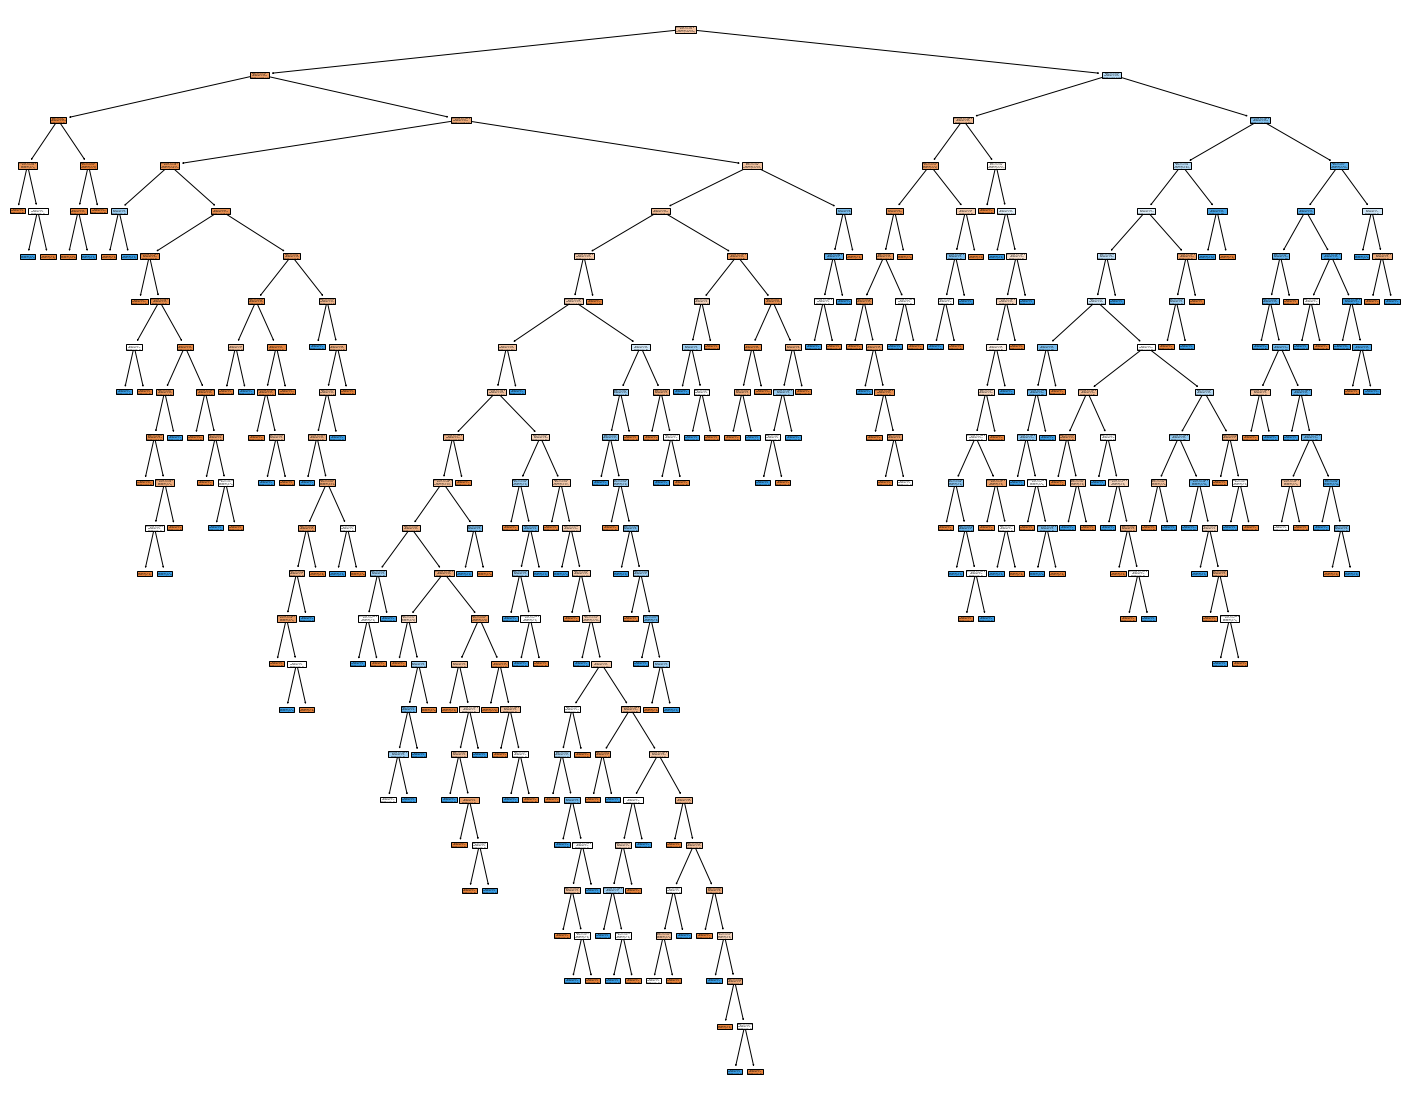

In [42]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train , y_train)

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(classifier , feature_names=['Glucose' , 'BMI'] , filled=True)

Yukarıda **,** hiçbir parametreyi değiştirmeden her şeyi DEFAULT olarak kullandığımız için **,** kocaman bir Ağaç yaratmış olduk ve bu durum bizim istediğimiz bir şey değil...

+ Şimdi de biraz CEZA'yı arttırarak yeni bir Ağaç yaratalım **:**

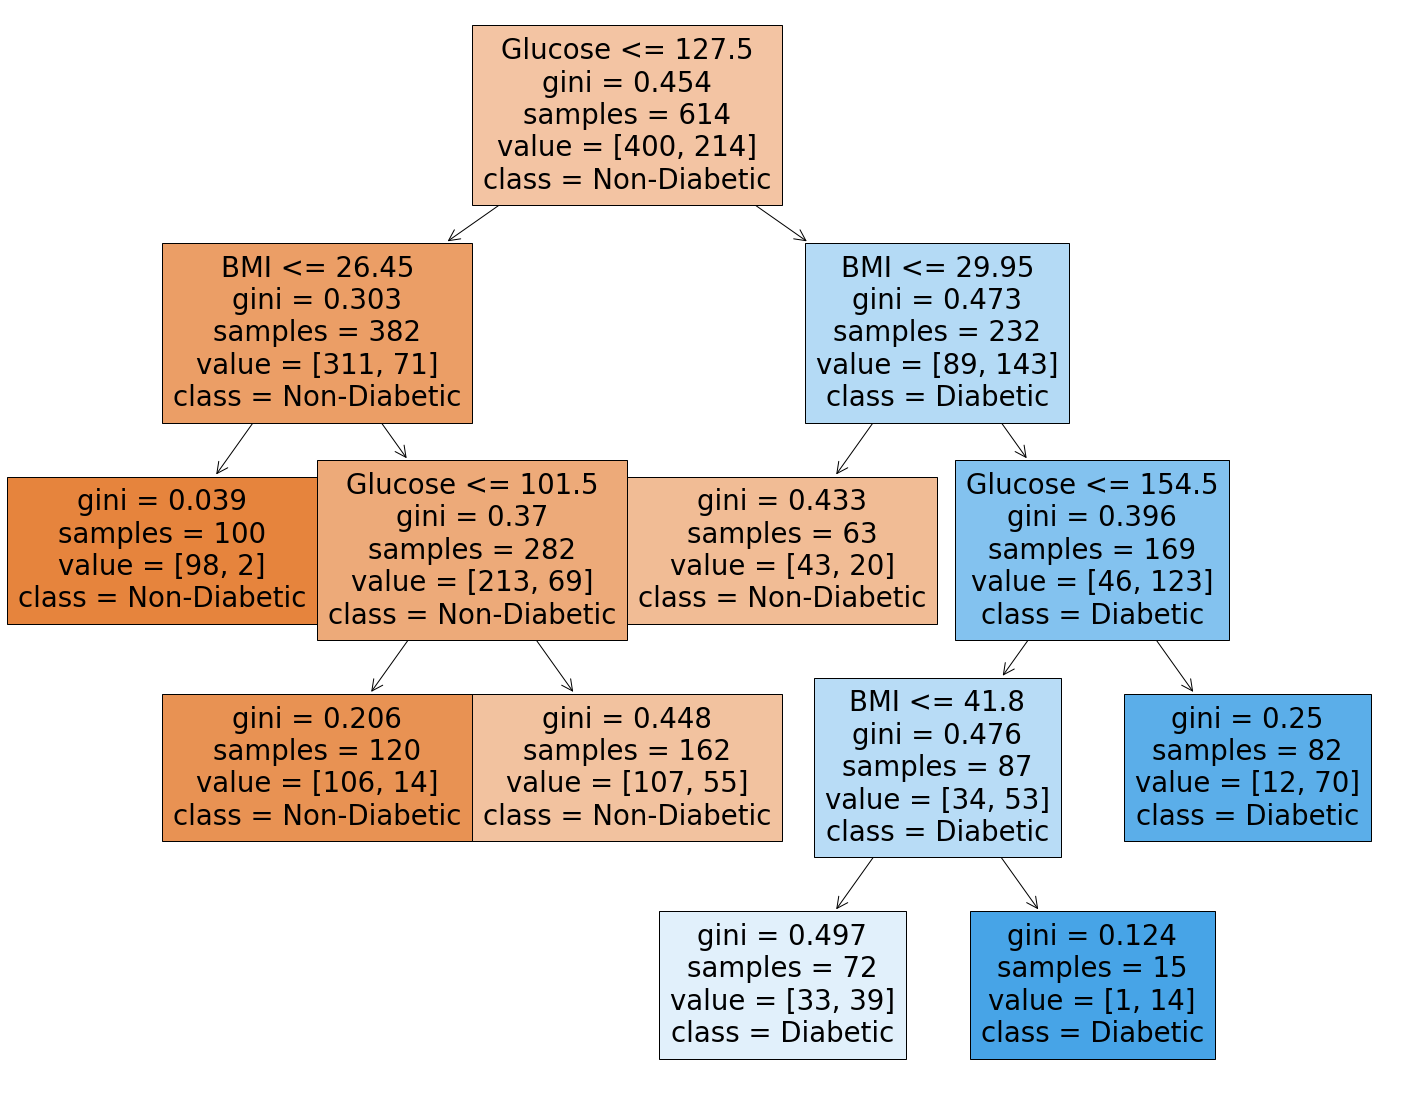

In [85]:
classifier = DecisionTreeClassifier(ccp_alpha=0.005)
classifier.fit(X_train , y_train)
fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(classifier , class_names=['Non-Diabetic','Diabetic'] , feature_names=['Glucose','BMI'] ,
                   filled=True)

**Yukarıdaki Ağaca bakarak birkaç yorum yapalım :**
+ (**'Glucose' <= 127.5**) ve (**'BMI' <= 26.5**) ise **%98** ihtimalle **Non-Diabetic** bir insandır... gibi ...

**+--- NOTE ---> Threshold**'u değiştirerek **,** başka Sınıflandırmalar da yapabiliriz...

+ Bu Ağacı kullanarak bir Tahminleme yapalım **:**

In [86]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test , y_pred)

0.7532467532467533

**TEST Accuracy = 0.7532467532467533**

+ GERÇEK ile Tahminleri karşılaştıralım **:**

**+--- NOTE --->** Aşağıda **, (drop=True)** komutunu kullanmamızın sebebi **;** DataFrame'mizde **,** Indexlerin görünmesini engellemektir...

In [87]:
comp=pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})
comp = pd.concat([X_test.reset_index(drop=True) , comp.reset_index(drop=True)] , axis= 1)
comp

,Glucose,BMI,Actual,Predicted
0,99,25.6,0,0
1,143,26.2,0,0
2,89,31.2,0,0
3,119,25.2,0,0
4,126,29.6,0,0
...,...,...,...,...
149,105,36.9,0,0
150,143,45.0,0,1
151,106,34.2,0,0
152,171,33.3,1,1


Yani mesela yukarıda **'150'**'nci Indexteki insanda modelimiz hata yapmış... **Glucose=143 , 'BMI'=45** olan insan GERÇEKTE Diyabet DEĞİLMİŞ ama modelimiz DİYABET olarak Sınıflandırmış...

Yarattığımız **'classifier'** isimli **Decision Tree Classifier** Ağacımızın içerisinde **``'predict_proba'``** isimli bir fonksiyonumuz var. Bu fonksiyon **,** bize **olasılıkları (ihtimalleri)** söyler... İçerisine yazdığımız Veri Setinin her bir verisi için olan ihtimalleri tek tek bize verir... **:** 

In [88]:
y_predprobs = classifier.predict_proba(X_test)
y_predprobs

array([[0.98      , 0.02      ],
       [0.68253968, 0.31746032],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.66049383, 0.33950617],
       [0.66049383, 0.33950617],
       [0.98      , 0.02      ],
       [0.98      , 0.02      ],
       [0.14634146, 0.85365854],
       [0.98      , 0.02      ],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.98      , 0.02      ],
       [0.68253968, 0.31746032],
       [0.66049383, 0.33950617],
       [0.45833333, 0.54166667],
       [0.98      , 0.02      ],
       [0.45833333, 0.54166667],
       [0.14634146, 0.85365854],
       [0.88333333, 0.11666667],
       [0.66049383, 0.33950617],
       [0.98      , 0.02      ],
       [0.66049383, 0.33950617],
       [0.66049383, 0.33950617],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.98      , 0.02      ],
       [0.68253968, 0.31746032],
       [0.

Artık en iyi 'ALPHA' (CEZA) değerini bulup Ağacımızı o şekilde yaratmamız lazım... Bunun için de öncelikle farklı 'ALPHA' değerlerini denememiz lazım... **:**

In [14]:
classifier = DecisionTreeClassifier()

path = classifier.cost_complexity_pruning_path(X_train , y_train)
path

{'ccp_alphas': array([0.        , 0.0004886 , 0.00054289, 0.00054289, 0.00065147,
        0.00086862, 0.00100822, 0.00100822, 0.0010193 , 0.00104235,
        0.00104958, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
        0.00108578, 0.00110284, 0.00114257, 0.00118448, 0.00122012,
        0.0012215 , 0.0012215 , 0.0012215 , 0.0012215 , 0.0012215 ,
        0.00127687, 0.00127966, 0.00128978, 0.00130293, 0.00135722,
        0.001396  , 0.0014409 , 0.00146114, 0.0014658 , 0.00153818,
        0.00154723, 0.00157931, 0.00158497, 0.00159535, 0.00169653,
        0.00171804, 0.00173724, 0.00174738, 0.00190528, 0.0019544 ,
        0.0019801 , 0.002094  , 0.00210369, 0.00217155, 0.00217155,
        0.002443  , 0.0025038 , 0.00256336, 0.00303182, 0.00303949,
        0.00304017, 0.00304017, 0.00341779, 0.00380022, 0.00441578,
        0.00461912, 0.00478253, 0.00620297, 0.00821741, 0.01115047,
        0.0121389 , 0.02517158, 0.0871409 ]),
 'impurities': array([0.00651466, 0.00749186, 0.00803474

+ Bu **'path'**'in içerisinde **'ccp_alpha'** değerlerini kullanarak **,** bunlar üzerinden bir tür **Validation** yapabiliriz... **:**

In [15]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10 , random_state=10 , shuffle=True)

CVErrors = []

for i in path.ccp_alphas:
    for train_index , validation_index in cv.split(X_train):
        X_trainp , X_valid = X_train.iloc[train_index] , X_train.iloc[validation_index]
        y_trainp , y_valid = y_train.iloc[train_index] , y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(ccp_alpha=i)
        classifier.fit(X_trainp , y_trainp) 
        y_pred = classifier.predict(X_valid)
        CVErrors.append([i , accuracy_score(y_trainp, classifier.predict(X_trainp)) ,
                         accuracy_score(y_valid, y_pred)])

df = pd.DataFrame(CVErrors , columns=['alpha', 'Training Accuracy', 'Validation Accuracy'])

kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()

#   En iyi ALPHA değerini bulmak için 'Accuracy' hesapladığımızdan dolayı , bu defa Büyükten Küçüğe bir
# sıralama yapacağız... Yani (ascending=False) yapacağız :
kfoldCV_by_alpha.sort_values(by=['Validation Accuracy'] , ascending=False).head()

,alpha,Training Accuracy,Validation Accuracy
54,0.011150,0.776691,0.767134
55,0.012139,0.776691,0.767134
53,0.008217,0.776691,0.767134
50,0.004619,0.786100,0.758911
49,0.004416,0.787185,0.758911


+ Şimdi de bu yukarıdaki işlemin aynısını **'cross_val_score'** modülünü kullnarak daha hızlı bir şekilde yapalım **:**

In [17]:
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10 , shuffle=True , random_state=10)

CVErrors = []

for i in path.ccp_alphas:
    classifier = DecisionTreeClassifier(ccp_alpha=i)
    Errors = cross_val_score(classifier , X_train , y_train , scoring='accuracy' , cv=10)
    CVErrors.append([i , np.mean(Errors)])
    df = pd.DataFrame(CVErrors , columns=['Alpha' , 'Validation Accuracy'])

#   En iyi ALPHA değerini bulmak için 'Accuracy' hesapladığımızdan dolayı , bu defa Büyükten Küçüğe bir
# sıralama yapacağız... Yani (ascending=False) yapacağız :
df.sort_values(by=['Validation Accuracy'] , ascending=False).head(3)

,Alpha,Validation Accuracy
65,0.012139,0.767081
64,0.011150,0.767081
63,0.008217,0.763855


+ Şimdi de **,** EN İYİ 'ALPHA' değerini seçtikten sonra **,** Ağacımızı en baştan **'construct'** edeceğiz **:**

Test Accuracy: 0.7532467532467533


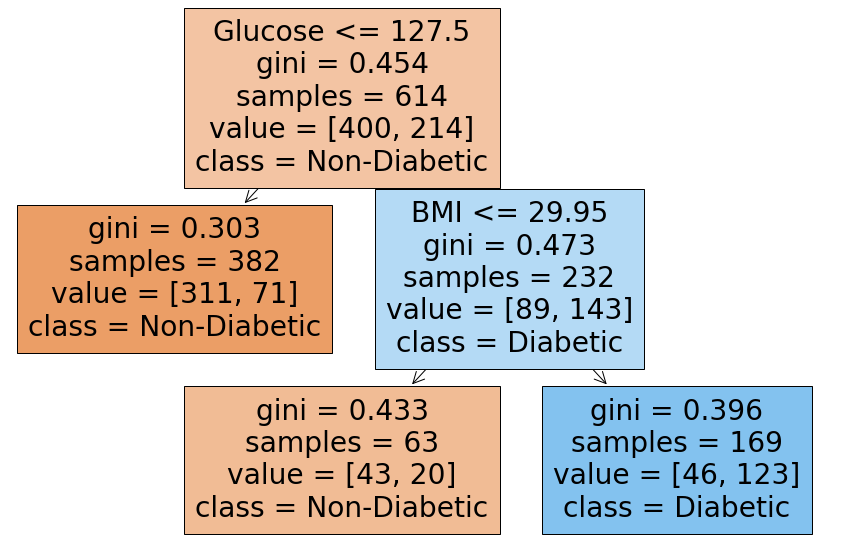

In [18]:
classifier = DecisionTreeClassifier(ccp_alpha=0.012139)

classifier.fit(X_train , y_train)

fig = plt.figure(figsize=(15 , 10))
_ = tree.plot_tree(classifier , class_names=['Non-Diabetic','Diabetic'] ,
                   feature_names=['Glucose','BMI'] , filled=True)

y_pred = classifier.predict(X_test)

print('Test Accuracy:' , accuracy_score(y_test , y_pred))

**TEST Accuracy = 0.7532467532467533**

+ Şimdi de **,** sadece **Glucose** ve **BMI**'yı **değil de ,** TÜM Veri Setini kullanalım **:**

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [23]:
df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome' , axis=1)
y = df['Outcome']

X_col = X.columns
X_col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [20]:
#   Split data into training and test sets :
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1 , stratify=y)

In [30]:
classifier = DecisionTreeClassifier() 

path = classifier.cost_complexity_pruning_path(X_train , y_train)

cv = KFold(n_splits=10 , random_state=10 , shuffle=True)

CVErrors = []

for i in path.ccp_alphas:
    for train_index , validation_index in cv.split(X_train):
        X_trainp , X_valid = X_train.iloc[train_index] , X_train.iloc[validation_index]
        y_trainp , y_valid = y_train.iloc[train_index] , y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(ccp_alpha=i)
        classifier.fit(X_trainp , y_trainp) 
        y_pred = classifier.predict(X_valid)
        CVErrors.append([i , accuracy_score(y_trainp, classifier.predict(X_trainp)),
                                            accuracy_score(y_valid, y_pred)])

df = pd.DataFrame(CVErrors,columns=['alpha' , 'Training Error' , 'Validation Accuracy'])

kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha.sort_values(by=['Validation Accuracy'] , ascending=False).head(3)

,alpha,Training Error,Validation Accuracy
50,0.018590,0.774517,0.763908
43,0.004810,0.859929,0.754151
41,0.004282,0.877845,0.750899


+ Şimdi de yukarıdaki işlemin aynısını **, 'Cross Validation'** tekniği ile yapalım **:**

In [29]:
classifier = DecisionTreeClassifier()

path = classifier.cost_complexity_pruning_path(X_train , y_train)

cv = KFold(n_splits=10 , shuffle=True , random_state=10)

CVErrors = []

for i in path.ccp_alphas:
    classifier = DecisionTreeClassifier(ccp_alpha=i)
    Errors = cross_val_score(classifier , X_train , y_train , scoring='accuracy' , cv=10)
    CVErrors.append([i , np.mean(Errors)])
    df = pd.DataFrame(CVErrors , columns=['Alpha' , 'Validation Accuracy'])

#   En iyi ALPHA değerini bulmak için 'Accuracy' hesapladığımızdan dolayı , bu defa Büyükten Küçüğe bir
# sıralama yapacağız... Yani (ascending=False) yapacağız :
df.sort_values(by=['Validation Accuracy'] , ascending=False).head(3)

,Alpha,Validation Accuracy
55,0.018590,0.767081
47,0.004638,0.749233
40,0.003393,0.749207


+ Bulduğumuz EN İYİ 'ALPHA' değeri ile **Karar Ağacımızı** yaratalım ve **'Accuracy'** değerine bakalım **:**

Test Accuracy: 0.7532467532467533


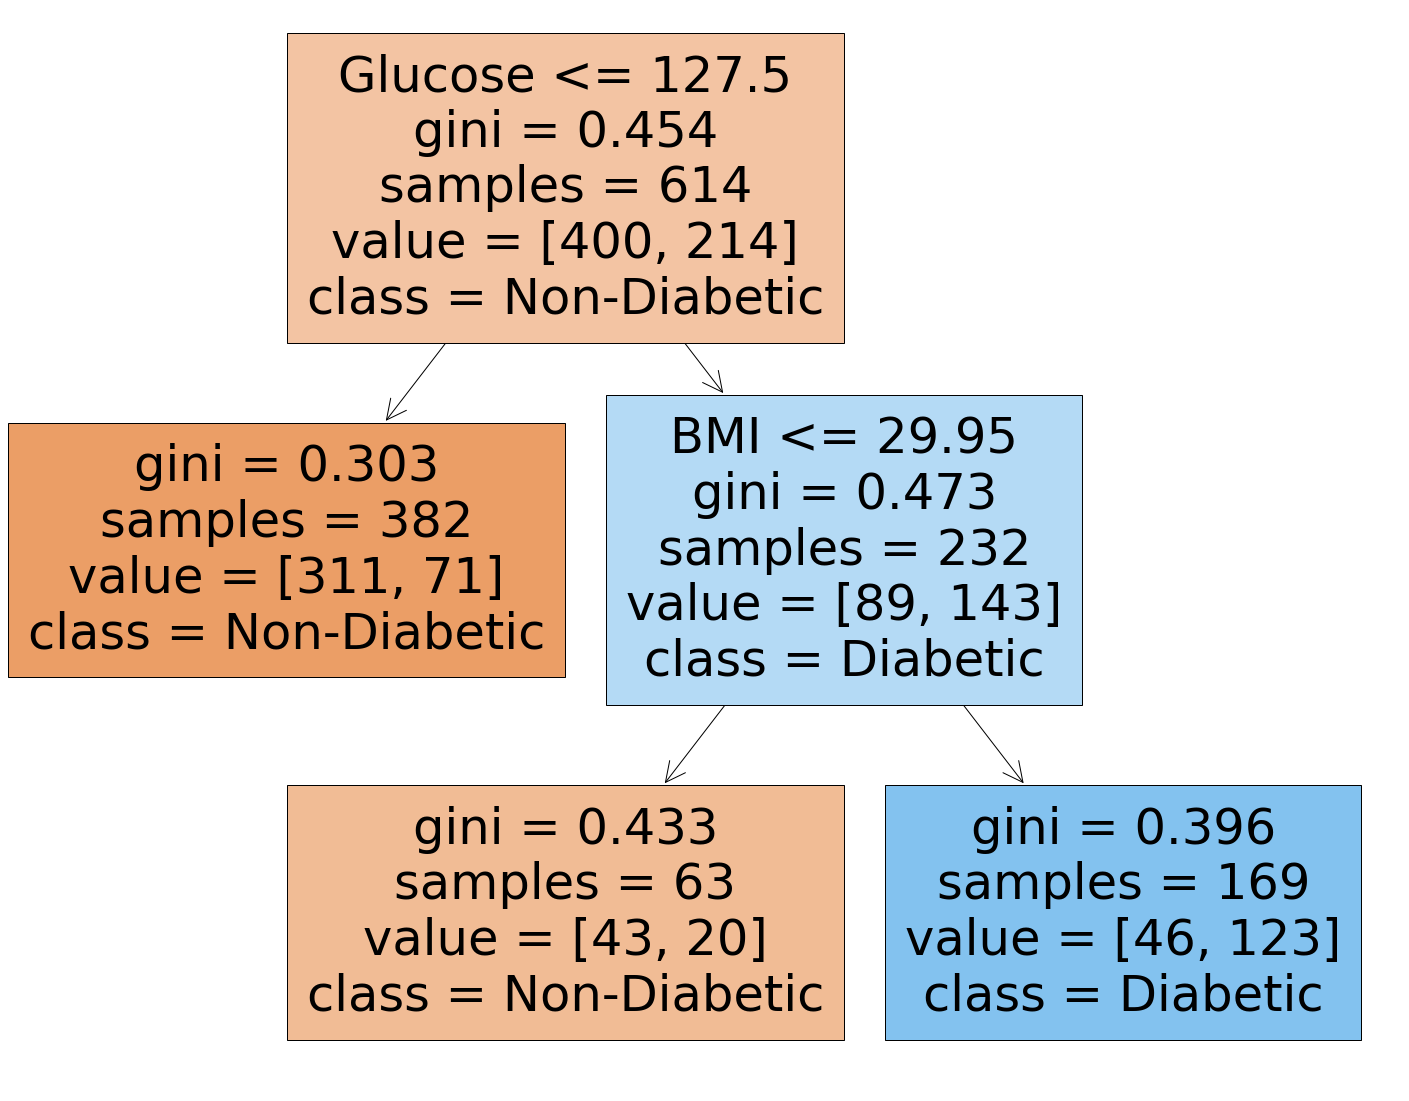

In [96]:
classifier = DecisionTreeClassifier(ccp_alpha=0.018590)  

classifier.fit(X_train , y_train) 

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(classifier , class_names=['Non-Diabetic', 'Diabetic'] , feature_names=X_col , filled=True)

y_pred = classifier.predict(X_test)

print('Test Accuracy:' , accuracy_score(y_test, y_pred))

Yukarıda gördüğümüz gibi , Veri Setinin tüm FEATURE'lerini kullandığımızda da pek bir şey değişmedi... **'BMI'** ve **'Glucose'** kullanmak **,** Ağacımızı yaratmamız için gayet yeterli oldu...

In [97]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
678,3,121,52,0,0,36.0,0.127,25
53,8,176,90,34,300,33.7,0.467,58
665,1,112,80,45,132,34.8,0.217,24
219,5,112,66,0,0,37.8,0.261,41
720,4,83,86,19,0,29.3,0.317,34
...,...,...,...,...,...,...,...,...
88,15,136,70,32,110,37.1,0.153,43
137,0,93,60,25,92,28.7,0.532,22
645,2,157,74,35,440,39.4,0.134,30
308,0,128,68,19,180,30.5,1.391,25


+ Şimdi de bir **Confusion Matrix** yaratalım **:**

In [98]:
confusion_matrix(y_test , y_pred)

array([[89, 11],
       [27, 27]], dtype=int64)

Yukarıdaki matrise baktığımızda **;** modelimiz **,** diyabetli insanları ayırmakta sorun yaşıyor...
<br> **Logistic Regression ,** bu veri setinde daha iyi bir iş çıkarıyordu...
<br> Ama **'Threshold'**'lar ile oynayarak bu verimsizliği azaltabiliriz...

**++++ NOTE ++++**
<br> **Decision Tree** Tekniğinde **,** Veri Setinin **Featurelerine 'split'** atma işlemi yaparken **;** örneğin **, GINI Index**'in en düşük olduğu **Feature** hangisi ise direkt o Feature ile **Ağaç** yaratmaya başlıyor. O **Featureye** bir sürü **'split'** atılıyor ve **GINI Index**'i EN ÇOK azaltan **'split'** seçiliyor. Ve Sonra o **'split'** ile ikiye ayırdığı **Featurenin** ayrı ayrı iki bölümüne de bir sürü **'split'**'ler atıp **,** yine **GINI Index**'i en çok düşüren **'split'** seçiliyor ve bir **'split'** daha atıyor... Ve bu şekilde **GINI Index**'in anlamlı şekilde azalması bitene kadar EN İYİ **'split'**'i seçe seçe Ağaç büyüyor...